In [82]:
# following:
# https://astroplan.readthedocs.io/en/v0.9/tutorials/summer_triangle.html#summer-triangle-optimal-observation
import numpy as np
from astroplan import Observer
import astropy as apy
import warnings
# filter astropy warning on fits headers
warnings.filterwarnings('ignore', category=UserWarning, append=True)

subaru = Observer.at_site('subaru')
ohp = Observer.at_site('ohp')
print(ohp)

<Observer: name='ohp',
    location (lon, lat, el)=(5.713333333333334 deg, 43.93083333333333 deg, 650.0000000000365 m),
    timezone=<UTC>>


In [41]:
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget

# example defining a target

altair = FixedTarget.from_name('Altair')
vega = FixedTarget.from_name('Vega')
# NB: this method actually queries from SIMBAD at CDS!!

<FixedTarget "Altair" at SkyCoord (ICRS): (ra, dec) in deg (297.6958273, 8.8683212)>


In [46]:
file_path = './list_objects.txt'
# Load the data from the txt file
objs=np.loadtxt(file_path,dtype=str)
# now make targets:
targets=[]
for obj in objs:
    newtarg=FixedTarget.from_name(obj)
    targets=np.append(targets,newtarg)

NameResolveError: Unable to find coordinates for name 'CQTau' using http://cdsweb.u-strasbg.fr/cgi-bin/nph-sesame/A?CQTau

In [51]:
# lets try to understand what is not working here:
file_path = './list_objects.txt'
# Load the data from the txt file
objs=np.loadtxt(file_path,dtype=str)
#print(FixedTarget.from_name('CQTau')) 
#print(FixedTarget.from_name('CQ Tau')) 
print(FixedTarget.from_name('TTau'))



<FixedTarget "TTau" at SkyCoord (ICRS): (ra, dec) in deg (65.497617, 19.535174)>


In [53]:
# ok so lets fix the target list
objs[objs=='CQTau']='CQ Tau'
print(objs)

['NGC40' 'M77' 'M42' 'CQ Tau' 'TTau' 'HD53367' 'M1' 'SH2-247' 'SH2-257'
 'NGC2273' 'NGC2392' 'MRK710' 'M81' 'M82' 'MRK35' 'NGC4258' 'M87' 'MRK59'
 'NGC6543' 'WR137' 'NGC6960' 'SH2-125' 'NGC7027' 'NGC1275']


In [54]:
# now retry to make the targets:
targets=[]
for obj in objs:
    newtarg=FixedTarget.from_name(obj)
    targets=np.append(targets,newtarg)

In [56]:
print(targets)
print(len(targets))
print(len(objs))

[<FixedTarget "NGC40" at SkyCoord (ICRS): (ra, dec) in deg (3.2694, 72.5222)>
 <FixedTarget "M77" at SkyCoord (ICRS): (ra, dec) in deg (40.66962153, -0.01329436)>
 <FixedTarget "M42" at SkyCoord (ICRS): (ra, dec) in deg (83.82, -5.39)>
 <FixedTarget "CQ Tau" at SkyCoord (ICRS): (ra, dec) in deg (83.99361094, 24.74835874)>
 <FixedTarget "TTau" at SkyCoord (ICRS): (ra, dec) in deg (65.497617, 19.535174)>
 <FixedTarget "HD53367" at SkyCoord (ICRS): (ra, dec) in deg (106.1075, -10.449)>
 <FixedTarget "M1" at SkyCoord (ICRS): (ra, dec) in deg (83.6287, 22.0147)>
 <FixedTarget "SH2-247" at SkyCoord (ICRS): (ra, dec) in deg (92.09583333, 21.58833333)>
 <FixedTarget "SH2-257" at SkyCoord (ICRS): (ra, dec) in deg (93.18264936, 17.98854806)>
 <FixedTarget "NGC2273" at SkyCoord (ICRS): (ra, dec) in deg (102.5392, 60.8371)>
 <FixedTarget "NGC2392" at SkyCoord (ICRS): (ra, dec) in deg (112.2948, 20.9143)>
 <FixedTarget "MRK710" at SkyCoord (ICRS): (ra, dec) in deg (148.70687917, 9.27163889)>
 <Fixe

In [4]:
# if we want to enter coords manually (because they are not resolved by simbad?)
#coordinates = SkyCoord('20h41m25.9s', '+45d16m49.3s', frame='icrs')
#deneb = FixedTarget(name='Deneb', coord=coordinates)

In [75]:
from astropy.time import Time
from astropy import units as u

# Define the local time of observation at OHP and UTC offset
local_time = '2023-12-13 00:00:00'
utc_offset = +1 * u.hour  # Legal time in France is UTC+1 hour in winter

# Create a Time object with the local time and time zone offset
time = Time(local_time, format='iso', scale='utc') - utc_offset

# Print the time in the local time zone
print(time)

2023-12-12 23:00:00.000


In [76]:
# are my targets observable at that time?
for target in targets:
    print(target)
    print(ohp.target_is_up(time, target))
# ok but are we sure it is night at the time 

<FixedTarget "NGC40" at SkyCoord (ICRS): (ra, dec) in deg (3.2694, 72.5222)>
True
<FixedTarget "M77" at SkyCoord (ICRS): (ra, dec) in deg (40.66962153, -0.01329436)>
True
<FixedTarget "M42" at SkyCoord (ICRS): (ra, dec) in deg (83.82, -5.39)>
True
<FixedTarget "CQ Tau" at SkyCoord (ICRS): (ra, dec) in deg (83.99361094, 24.74835874)>
True
<FixedTarget "TTau" at SkyCoord (ICRS): (ra, dec) in deg (65.497617, 19.535174)>
True
<FixedTarget "HD53367" at SkyCoord (ICRS): (ra, dec) in deg (106.1075, -10.449)>
True
<FixedTarget "M1" at SkyCoord (ICRS): (ra, dec) in deg (83.6287, 22.0147)>
True
<FixedTarget "SH2-247" at SkyCoord (ICRS): (ra, dec) in deg (92.09583333, 21.58833333)>
True
<FixedTarget "SH2-257" at SkyCoord (ICRS): (ra, dec) in deg (93.18264936, 17.98854806)>
True
<FixedTarget "NGC2273" at SkyCoord (ICRS): (ra, dec) in deg (102.5392, 60.8371)>
True
<FixedTarget "NGC2392" at SkyCoord (ICRS): (ra, dec) in deg (112.2948, 20.9143)>
True
<FixedTarget "MRK710" at SkyCoord (ICRS): (ra, dec

<IPython.core.display.Javascript object>


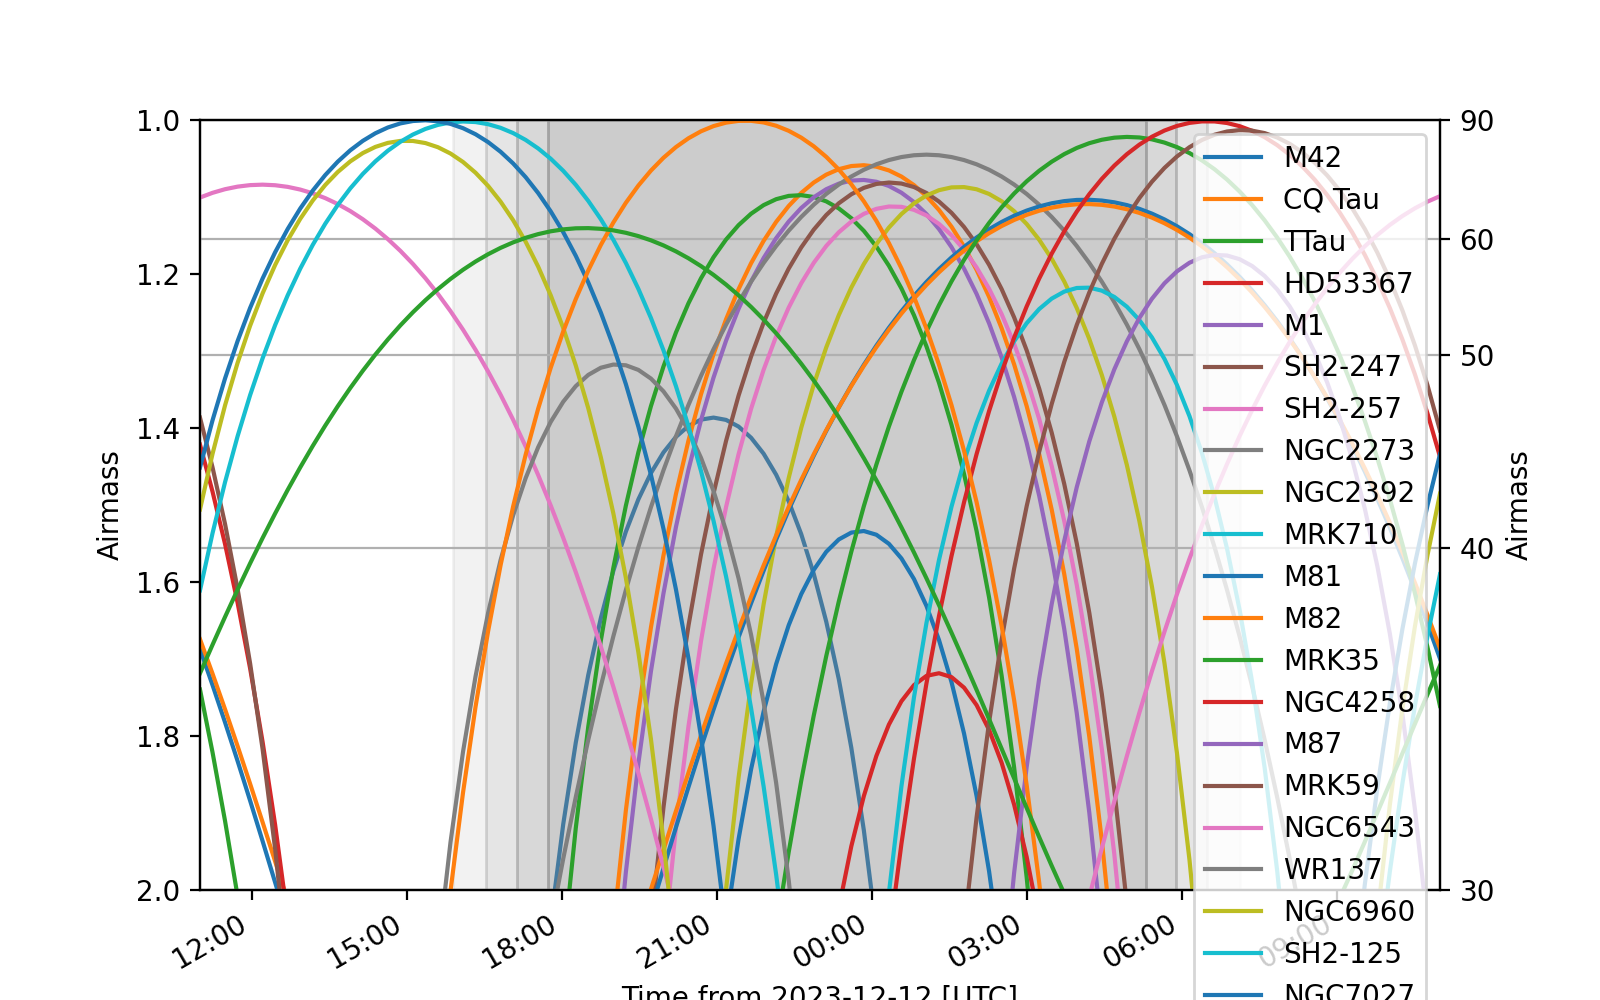

In [96]:
from astroplan.plots import plot_airmass 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore', category=UserWarning, append=True)
%matplotlib notebook 

style1={'linestyle': '--'}
style2={'linestyle': '-'}
style3={}

plt.figure(figsize=(8,5))
for target in targets[1:]:
    plot_airmass(target,ohp,time,altitude_yaxis=True,max_airmass=2,use_local_tz=True,brightness_shading=False,style_kwargs=style3)
plot_airmass(targets[0],ohp,time,altitude_yaxis=True,max_airmass=2,use_local_tz=True,brightness_shading=True)


#for target in targets[1:]:
#    plot_altitude(target,ohp,time,altitude_yaxis=True,max_airmass=2,use_local_tz=True,brightness_shading=False)
#plot_airmass(targets[0],ohp,time,altitude_yaxis=True,max_airmass=2,use_local_tz=True,brightness_shading=True)


plt.grid()

plt.legend(loc=1, bbox_to_anchor=(1, 1)) 
plt.show() 

In [25]:
from astropy.time import Time
from astropy.time import TimezoneInfo
from astropy import units as u

# Define the local time and time zone
local_time = '2015-06-16 12:00:00'
timezone = TimezoneInfo(utc_offset=-5.*u.hour)  # Replace with the correct UTC offset for your local time zone
print(timezone)

# Create a Time object with the local time and time zone
time = Time(local_time, format='iso', scale='utc', location=timezone)

# Print the time in the local time zone
print(time)

TypeError: type object argument after * must be an iterable, not TimezoneInfo

In [26]:
from astropy.time import Time, TimezoneInfo
from astropy import units as u

# Define the local time and time zone
local_time = '2015-06-16 12:00:00'
utc_offset = -5 * u.hour  # Replace with the correct UTC offset for your local time zone
timezone = TimezoneInfo(utc_offset=utc_offset)

# Create a Time object with the local time and time zone
time = Time(local_time, format='iso', scale='utc', location=timezone)

# Print the time in the local time zone
print(time)

TypeError: type object argument after * must be an iterable, not TimezoneInfo

In [29]:
from astropy.time import Time
from astropy import units as u

# Define the local time of observation at OHP and UTC offset
local_time = '2023-12-13 00:00:00'
utc_offset = +1 * u.hour  # Legal time in France is UTC+1 hour in winter

# Create a Time object with the local time and time zone offset
time = Time(local_time, format='iso', scale='utc') - utc_offset

# Print the time in the local time zone
print(time)

2015-06-16 07:00:00.000


In [28]:
# try to create a time for heure normale d'europe centrale (HNEC) directly:
local_time = '2015-06-16 12:00:00'
time = Time(local_time, format='iso', scale='hnec')


ScaleValueError: Scale 'hnec' is not in the allowed scales ['local', 'tai', 'tcb', 'tcg', 'tdb', 'tt', 'ut1', 'utc']